In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import re


In [2]:
laptopDataset=pd.read_csv("./laptop_data.csv")
laptopDataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
laptopDataset.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
laptopDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [5]:
laptopDataset.duplicated().sum()

29

In [6]:
laptopDataset.drop_duplicates(subset=None, keep='first', inplace=True)

In [7]:
laptopDataset.duplicated().sum()

0

In [8]:
laptopDataset.select_dtypes(include=["object"]).columns

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [9]:
laptopDataset.select_dtypes(include=['int32','int64','float32','float64']).columns

Index(['Inches', 'Price'], dtype='object')

In [10]:
laptopDataset["Ram"].value_counts()

8GB     613
4GB     366
16GB    198
6GB      35
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: Ram, dtype: int64

In [11]:
laptopDataset["Ram"]=laptopDataset["Ram"].apply(lambda x: int(x.replace("GB","")))

In [12]:
laptopDataset["Weight"]=laptopDataset["Weight"].apply(lambda x: float(x.replace("kg","")))

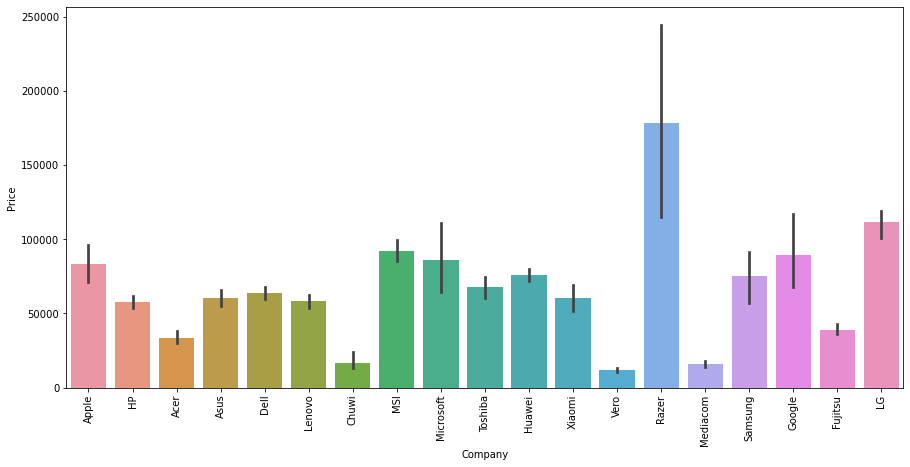

In [13]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary
plt.figure(figsize=(15,7))
sbn.barplot(x = laptopDataset['Company'],y = laptopDataset['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

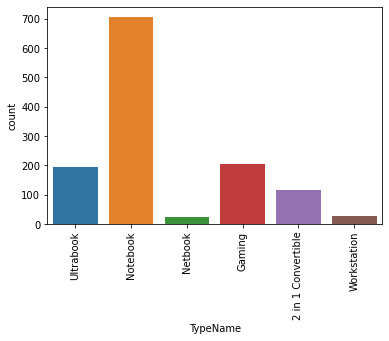

In [14]:
sbn.countplot(laptopDataset["TypeName"])
plt.xticks(rotation="vertical")

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

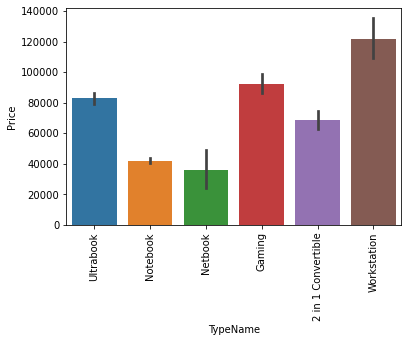

In [15]:
sbn.barplot(laptopDataset["TypeName"],laptopDataset["Price"])
plt.xticks(rotation="vertical")

In [16]:
laptopDataset['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel 2560x1440                           

In [17]:
x = re.findall("\d{3,}x\d{3,}", "Full HD 1920x1080")

In [18]:
laptopDataset['Touchscreen']=laptopDataset['ScreenResolution'].apply(lambda x:1 if "touchscreen" in x.lower() else 0)
laptopDataset['4K']=laptopDataset['ScreenResolution'].apply(lambda x:1 if "4k" in x.lower() else 0)
laptopDataset['IPS']=laptopDataset['ScreenResolution'].apply(lambda x:1 if "ips" in x.lower() else 0)

In [19]:
def getXResolution(x):
        x_resol=re.findall("\d{3,}x", x)
        if x_resol is not None:
            return int(x_resol(0).split("x")[0])
def getXResolution(y):
        y_resol=re.findall("x\d{3,}", y)
        if y_resol is not None:
            return int(y_resol[0].split("x")[1])

In [20]:
laptopDataset['X_Resolution']=laptopDataset['ScreenResolution'].apply(getXResolution)
laptopDataset['Y_Resolution']=laptopDataset['ScreenResolution'].apply(getXResolution)

In [21]:
laptopDataset.corr()["Price"]

Inches          0.066990
Ram             0.740106
Weight          0.212192
Price           1.000000
Touchscreen     0.188631
4K              0.344003
IPS             0.250358
X_Resolution    0.548111
Y_Resolution    0.548111
Name: Price, dtype: float64

**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**

**So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [22]:
laptopDataset['PPI'] = (((laptopDataset['X_Resolution']**2+laptopDataset['Y_Resolution']**2))**0.5/laptopDataset['Inches']).astype('float')
laptopDataset.corr()["Price"]

Inches          0.066990
Ram             0.740106
Weight          0.212192
Price           1.000000
Touchscreen     0.188631
4K              0.344003
IPS             0.250358
X_Resolution    0.548111
Y_Resolution    0.548111
PPI             0.462985
Name: Price, dtype: float64

In [23]:
laptopDataset.drop(columns=['ScreenResolution','Inches','X_Resolution','Y_Resolution'],axis=1,inplace=True)
laptopDataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,4K,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,170.130955
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,95.698662
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0,97.907093
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,1,165.297689
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,1,170.130955


In [24]:
laptopDataset['Cpu'].value_counts().head(40)

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              132
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               41
Intel Core i7 6700HQ 2.6GHz              41
Intel Core i3 7100U 2.4GHz               35
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     24
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i5 7300U 2.6GHz               14
Intel Core i7 7600U 2.8GHz               13
AMD A9-Series 9420 3GHz                  11
Intel Pentium Quad Core N3710 1.6GHz     11
Intel Core i5 6300U 2.4GHz               11
Intel Core i7 6820HK 2.7GHz              10
Intel Core i3 6100U 2.3GHz      

In [25]:
laptopDataset['Processor']=laptopDataset['Cpu'].apply(lambda x:" ".join(x.split(" ")[:3]))

In [26]:
def getProcessor_version(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor'

In [27]:
laptopDataset['Processor']=laptopDataset['Processor'].apply(getProcessor_version)
laptopDataset["Processor"].value_counts()

Intel Core i7            515
Intel Core i5            423
Other Intel Processor    141
Intel Core i3            134
AMD Processor             61
Name: Processor, dtype: int64

In [28]:
laptopDataset["Processor"][0]=="Intel Core i5"

True

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Processor', ylabel='count'>

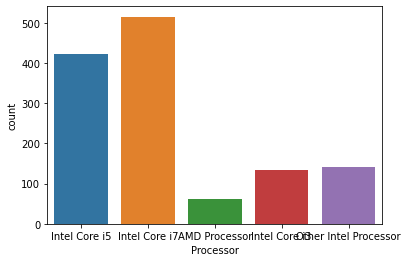

In [29]:
sbn.countplot(laptopDataset["Processor"])

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Processor', ylabel='Price'>

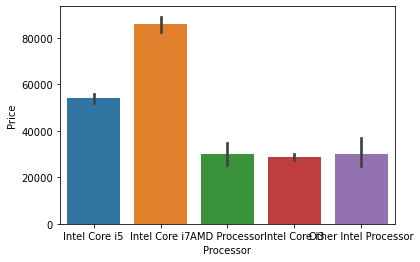

In [30]:
sbn.barplot(laptopDataset["Processor"],laptopDataset["Price"])

In [31]:
laptopDataset.drop("Cpu",inplace=True,axis=1)

In [32]:
laptopDataset.corr()["Price"]

Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
4K             0.344003
IPS            0.250358
PPI            0.462985
Name: Price, dtype: float64

In [33]:
laptopDataset["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
128GB HDD                          1
6

In [34]:
#remove .
laptopDataset['Memory'] = laptopDataset['Memory'].astype(str).replace('\.0','',regex = True)
#change tb to gb
laptopDataset['Memory'] = laptopDataset['Memory'].astype(str).replace('TB','000',regex = True)
#remove GB
laptopDataset['Memory'] = laptopDataset['Memory'].astype(str).replace('GB','000',regex = True)
#deivide the data
newdf = laptopDataset['Memory'].str.split("+",n=1,expand = True)
newdf

,0,1
0,128000 SSD,None
1,128000 Flash Storage,None
2,256000 SSD,None
3,512000 SSD,None
4,256000 SSD,None
...,...,...
1269,500000 HDD,None
1270,128000 SSD,None
1271,512000 SSD,None
1272,64000 Flash Storage,None


In [35]:
laptopDataset["first_memory"]=newdf[0].apply(lambda x: None if x is None else int(x.split(" ")[0]))

In [36]:
newdf[1]=newdf[1].str.strip()
laptopDataset["second_memory"]=newdf[1].apply(lambda x: 0 if x is None else int(x.split(" ")[0]))

In [37]:
memory=["SSD","HDD","Hybrid","Flash_Storage"]
def setMemory(mem):
    laptopDataset["first_memory_"+mem]=newdf[0].apply(lambda x:1 if mem in x else 0)
    laptopDataset["second_memory_"+mem]=newdf[1].apply(lambda x:1 if x is not None and mem in x else 0) 
for m in memory:
    setMemory(m)

In [38]:
laptopDataset.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,4K,...,first_memory,second_memory,first_memory_SSD,second_memory_SSD,first_memory_HDD,second_memory_HDD,first_memory_Hybrid,second_memory_Hybrid,first_memory_Flash_Storage,second_memory_Flash_Storage
0,Apple,Ultrabook,8,128000 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,...,128000,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128000 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128000,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256000 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256000,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512000 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,...,512000,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256000 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,...,256000,0,1,0,0,0,0,0,0,0


In [39]:
laptopDataset.corr()["Price"]

Ram                            0.740106
Weight                         0.212192
Price                          1.000000
Touchscreen                    0.188631
4K                             0.344003
IPS                            0.250358
PPI                            0.462985
first_memory                   0.307394
second_memory                  0.034875
first_memory_SSD               0.506471
second_memory_SSD              0.022869
first_memory_HDD              -0.425176
second_memory_HDD              0.294292
first_memory_Hybrid           -0.029467
second_memory_Hybrid           0.105266
first_memory_Flash_Storage          NaN
second_memory_Flash_Storage         NaN
Name: Price, dtype: float64

In [40]:
laptopDataset.drop(["first_memory_Flash_Storage","second_memory_Flash_Storage","Memory"],axis=1,inplace=True)

In [41]:
laptopDataset.corr()["Price"]

Ram                     0.740106
Weight                  0.212192
Price                   1.000000
Touchscreen             0.188631
4K                      0.344003
IPS                     0.250358
PPI                     0.462985
first_memory            0.307394
second_memory           0.034875
first_memory_SSD        0.506471
second_memory_SSD       0.022869
first_memory_HDD       -0.425176
second_memory_HDD       0.294292
first_memory_Hybrid    -0.029467
second_memory_Hybrid    0.105266
Name: Price, dtype: float64

In [42]:
laptopDataset.select_dtypes(include=["object"]).columns

Index(['Company', 'TypeName', 'Gpu', 'OpSys', 'Processor'], dtype='object')

In [43]:
laptopDataset["OpSys"].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [44]:
def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
laptopDataset['OpSys'] = laptopDataset['OpSys'].apply(lambda x:setcategory(x))

In [45]:
laptopDataset["Gpu"].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 M315           1
AMD Radeon R5 520            1
AMD Radeon Pro 560           1
AMD Radeon Pro 555           1
Nvidia GTX 980 SLI           1
Name: Gpu, Length: 110, dtype: int64

In [46]:
laptopDataset['Gpu brand'] = laptopDataset['Gpu'].apply(lambda x:x.split()[0])

In [47]:
laptopDataset.drop("Gpu",axis=1,inplace=True)

In [48]:
laptopDataset.select_dtypes(include=["object"]).columns

Index(['Company', 'TypeName', 'OpSys', 'Processor', 'Gpu brand'], dtype='object')

In [49]:
laptopDataset["Company"].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
LG             3
Chuwi          3
Google         3
Fujitsu        3
Huawei         2
Name: Company, dtype: int64

In [50]:
newDataSet=pd.get_dummies(laptopDataset,drop_first=True)

In [51]:
newDataSet.corr()["Price"]

Ram                                0.740106
Weight                             0.212192
Price                              1.000000
Touchscreen                        0.188631
4K                                 0.344003
IPS                                0.250358
PPI                                0.462985
first_memory                       0.307394
second_memory                      0.034875
first_memory_SSD                   0.506471
second_memory_SSD                  0.022869
first_memory_HDD                  -0.425176
second_memory_HDD                  0.294292
first_memory_Hybrid               -0.029467
second_memory_Hybrid               0.105266
Company_Apple                      0.079224
Company_Asus                      -0.003529
Company_Chuwi                     -0.056966
Company_Dell                       0.049447
Company_Fujitsu                   -0.028201
Company_Google                     0.037601
Company_HP                        -0.040718
Company_Huawei                  

In [52]:
newDataSet.corr()["Price"].keys()

Index(['Ram', 'Weight', 'Price', 'Touchscreen', '4K', 'IPS', 'PPI',
       'first_memory', 'second_memory', 'first_memory_SSD',
       'second_memory_SSD', 'first_memory_HDD', 'second_memory_HDD',
       'first_memory_Hybrid', 'second_memory_Hybrid', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Other', 'OpSys_Windows',
       'Processor_Intel Core i3', 'Processor_Intel Core i5',
       'Processor_Intel Core i7', 'Processor_Other Intel Processor',
       'Gpu brand_ARM', 'Gpu brand_Intel', 'Gpu brand_Nvidia'],
      dtype='object')

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [63]:
X=newDataSet.drop(["Price"],axis=1)
y=newDataSet["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
params={"n_estimators":[50,100,150,200],"max_features":[2,3,5],'bootstrap': [True, False]}

In [66]:
estimator=RandomForestRegressor()
model=GridSearchCV(estimator,params,cv=5,)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 5],
                         'n_estimators': [50, 100, 150, 200]})

In [67]:
model.best_params_

{'bootstrap': True, 'max_features': 5, 'n_estimators': 150}

In [68]:
prediction=model.predict(X_test)

In [74]:
model.score(X_test,y_test)

0.784365739760826